# Import Libraries

In [1]:
import pandas as pd

# Read and Understand data

In [2]:
df_train = pd.read_csv("datasets/competition/train.csv")
df_test = pd.read_csv("datasets/competition/test.csv")

In [3]:
df_train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
df_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


## Summary

In [6]:
df_train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Check null values

In [7]:
df_train.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Check and removed duplicates

In [8]:
df_train.duplicated().sum()

0

In [9]:
# Check duplicates in train data excluding id column
train_dups = df_train.drop('id', axis=1).duplicated().sum()

print(f"Number of duplicate rows in training data (excluding id): {train_dups}")

# If you want to see the actual duplicate rows in train data
if train_dups > 0:
    print("\nDuplicate rows in training data:")
    print(df_train[df_train.drop('id', axis=1).duplicated()])


Number of duplicate rows in training data (excluding id): 2841

Duplicate rows in training data:
            id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
11643    11643  female   54   161.0    61.0      14.0        95.0       40.3   
18100    18100  female   54   161.0    61.0       9.0        88.0       39.7   
22070    22070    male   51   187.0    94.0       3.0        81.0       38.8   
26664    26664  female   67   169.0    69.0      24.0       104.0       40.7   
31062    31062  female   40   161.0    58.0      14.0        90.0       40.4   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749584  749584  female   39   161.0    61.0      13.0        99.0       40.3   
749823  749823  female   29   173.0    68.0      14.0        95.0       40.2   
749852  749852    male   21   187.0    90.0       9.0        91.0       39.7   
749889  749889    male   40   191.0    88.0       5.0        86.0       39.0   
749949  749949    male 

In [10]:
# Drop duplicates from train data (excluding id column)
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['id']), keep='first')

# Print the shapes of the datasets after removing duplicates
print(f"Training data shape after removing duplicates: {df_train.shape}")

Training data shape after removing duplicates: (747159, 9)


## Drop useless columns

In [11]:
df_train_c = df_train.drop(columns=["id"], axis=1)

In [12]:
df_train_c.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## Histogram

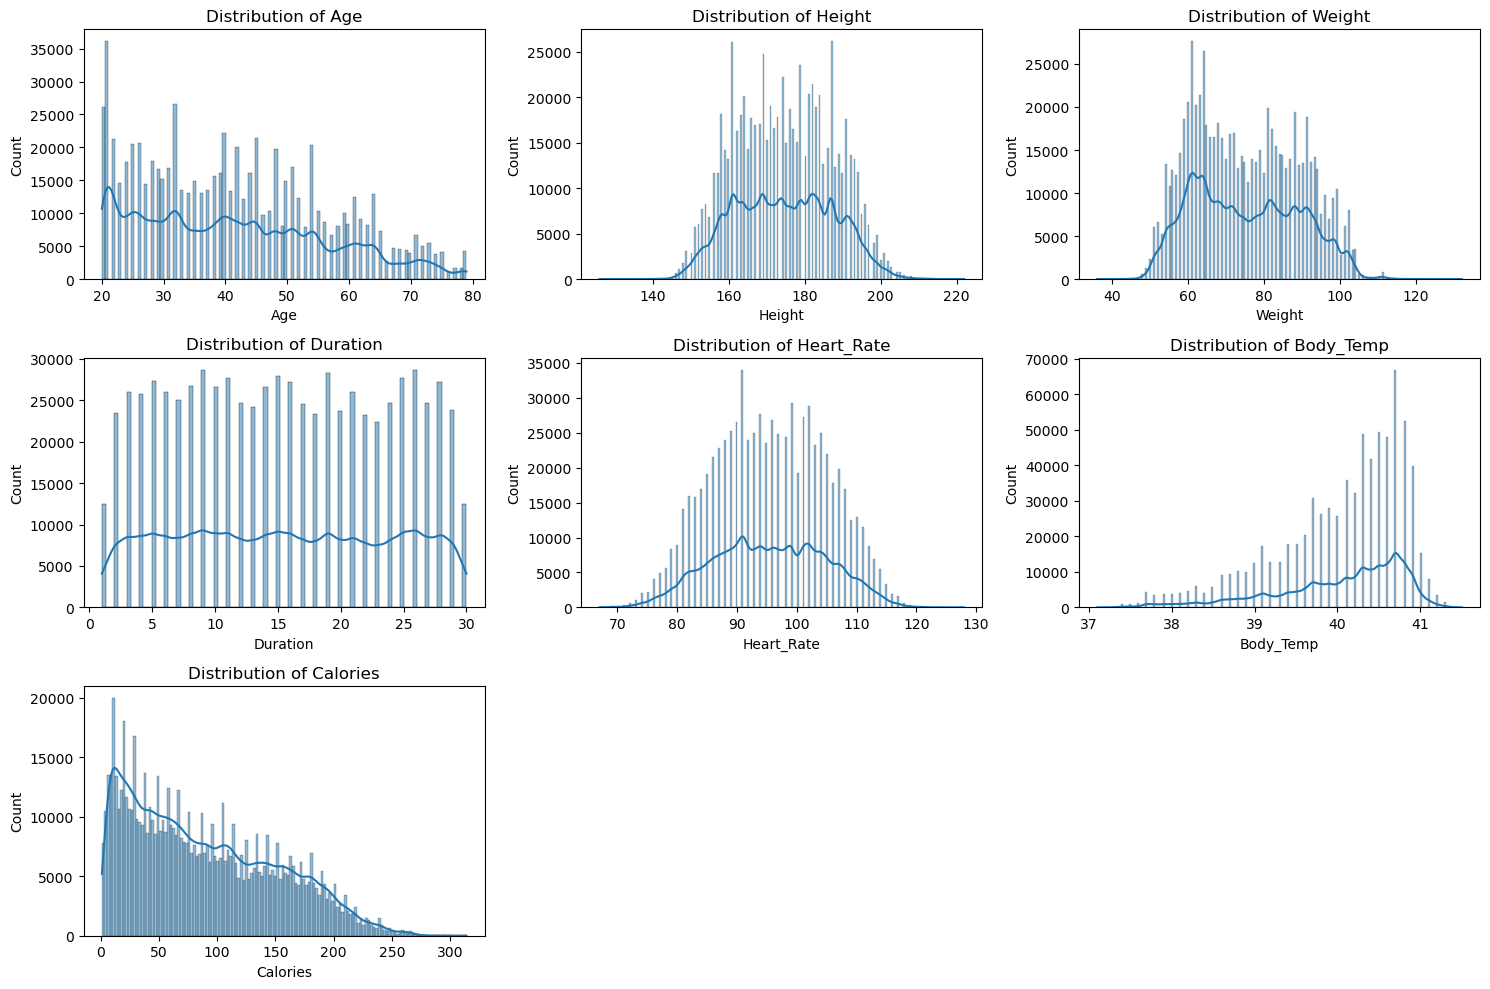

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create subplots for each numerical column
numerical_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_train_c, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

## Box Plot

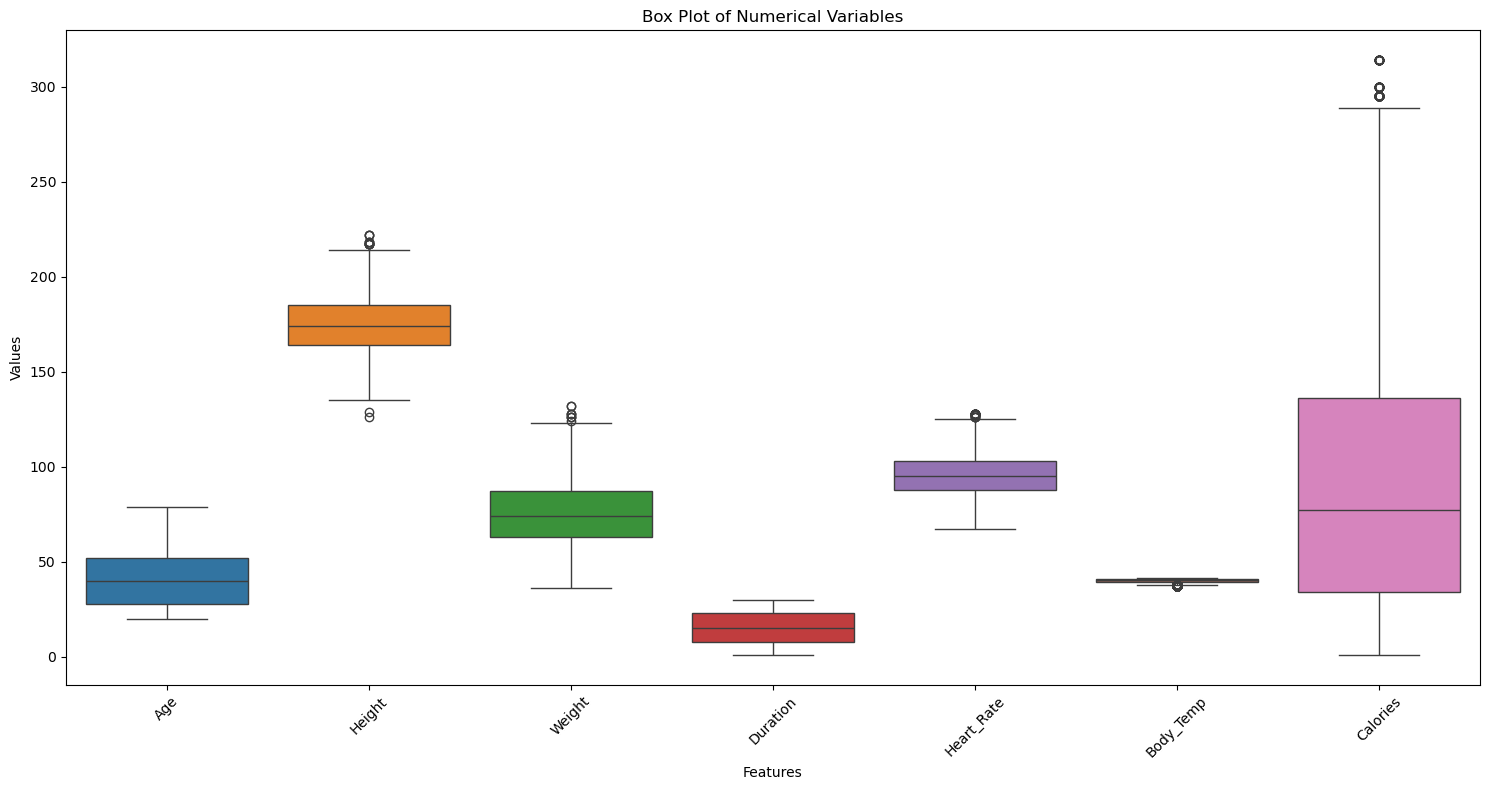

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_train_c[numerical_cols])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

## Boxcox transformation to reduce skewness 

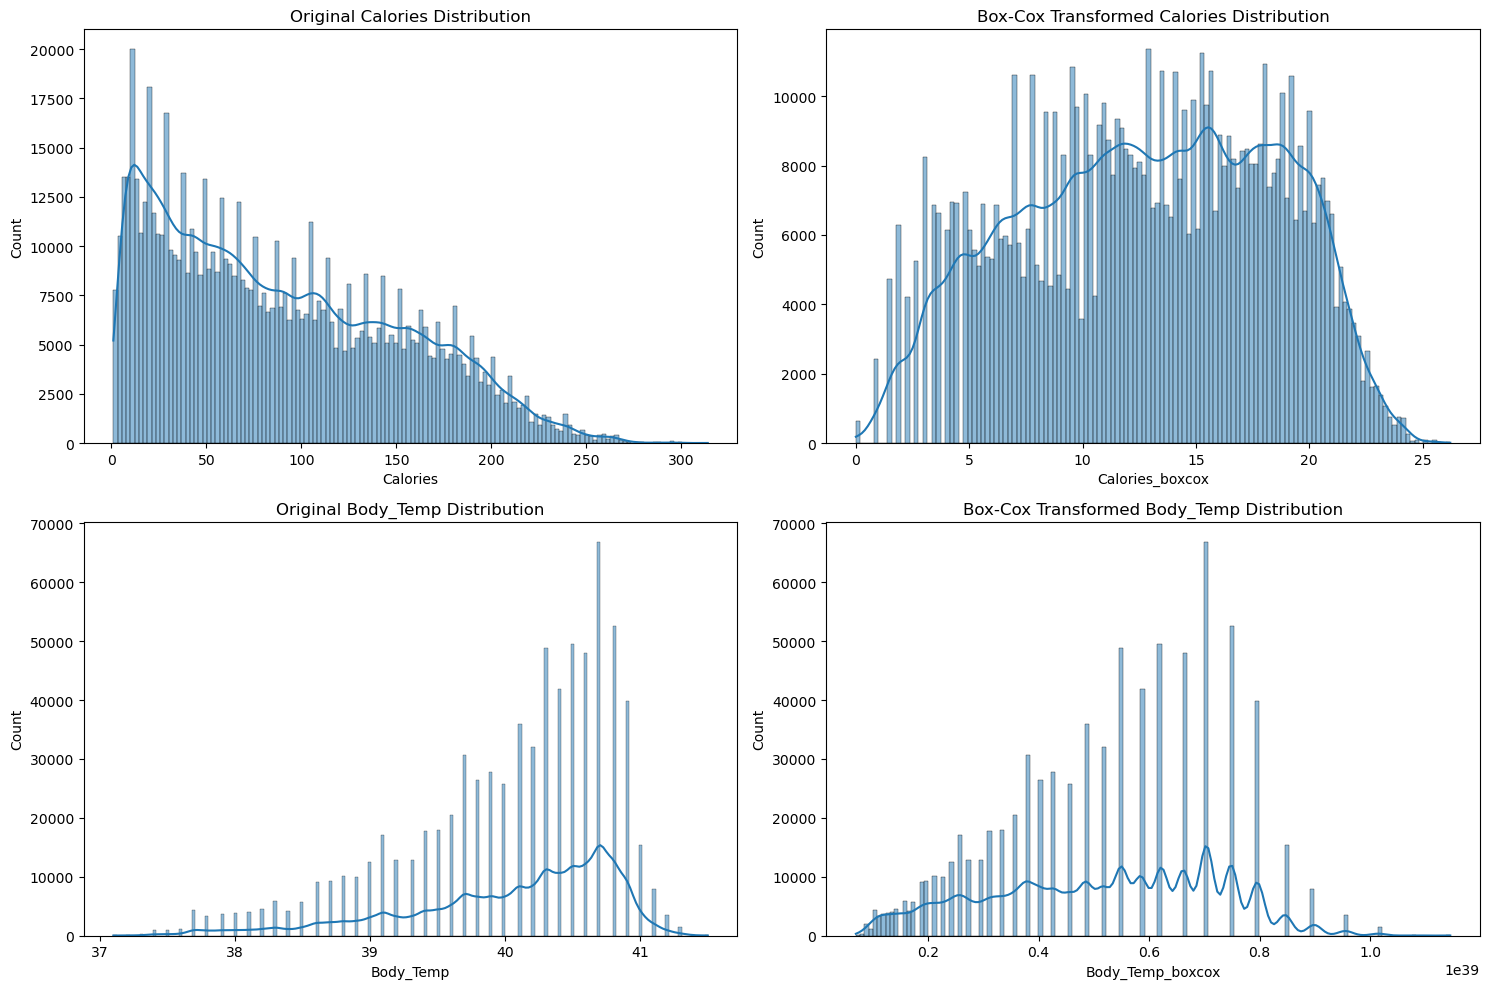

Lambda value for Calories transformation: 0.4397
Lambda value for Body_Temp transformation: 25.0035


In [15]:
from scipy import stats

# Perform Box-Cox transformation on Calories
calories_boxcox, lambda_calories = stats.boxcox(df_train_c['Calories'])
df_train_c['Calories_boxcox'] = calories_boxcox

# Perform Box-Cox transformation on Body_Temp
body_temp_boxcox, lambda_body_temp = stats.boxcox(df_train_c['Body_Temp'])
df_train_c['Body_Temp_boxcox'] = body_temp_boxcox

# Plot the original vs transformed distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot original Calories distribution
sns.histplot(data=df_train_c, x='Calories', kde=True, ax=axes[0,0])
axes[0,0].set_title('Original Calories Distribution')

# Plot transformed Calories distribution
sns.histplot(data=df_train_c, x='Calories_boxcox', kde=True, ax=axes[0,1])
axes[0,1].set_title('Box-Cox Transformed Calories Distribution')

# Plot original Body_Temp distribution
sns.histplot(data=df_train_c, x='Body_Temp', kde=True, ax=axes[1,0])
axes[1,0].set_title('Original Body_Temp Distribution')

# Plot transformed Body_Temp distribution
sns.histplot(data=df_train_c, x='Body_Temp_boxcox', kde=True, ax=axes[1,1])
axes[1,1].set_title('Box-Cox Transformed Body_Temp Distribution')

plt.tight_layout()
plt.show()

print(f"Lambda value for Calories transformation: {lambda_calories:.4f}")
print(f"Lambda value for Body_Temp transformation: {lambda_body_temp:.4f}")

In [16]:
df_train_c.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Calories_boxcox,Body_Temp_boxcox
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,18.314430,8.456026e+38
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,8.446112,3.778194e+38
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,7.721979,4.023483e+38
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,17.699266,7.037511e+38
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,18.071207,6.617684e+38


In [17]:
# Calculate BMI using the formula: weight (kg) / (height (m))^2
# Height is in cm, so we need to convert it to meters by dividing by 100
df_train_c['BMI'] = df_train_c['Weight'] / ((df_train_c['Height']/100) ** 2)

# Display the first few rows to verify the BMI calculation
df_train_c[['Height', 'Weight', 'BMI']].head()



,Height,Weight,BMI
0,189.0,82.0,22.955684
1,163.0,60.0,22.582709
2,161.0,64.0,24.690405
3,192.0,90.0,24.414062
4,166.0,61.0,22.136740


## Normalize data

In [18]:
df_train_c.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'Calories_boxcox', 'Body_Temp_boxcox', 'BMI'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()
numerical_cols = ['Age', 'Duration', 'Heart_Rate', 'Calories_boxcox', 'Body_Temp_boxcox', 'BMI']
x_numerical_cols = ['Age', 'Duration', 'Heart_Rate', 'Body_Temp_boxcox', 'BMI']
# Create a copy of numerical columns to be scaled
numerical_cols_to_scale = [col for col in numerical_cols if col not in ['Calories_boxcox', "Calories"]]  # excluding target variable

# Fit and transform the numerical columns
df_train_c[numerical_cols_to_scale] = scaler.fit_transform(df_train_c[numerical_cols_to_scale])

# Print the first few rows to verify the scaling
print("Data after normalization:")
print(df_train_c[numerical_cols_to_scale].head())
print("\nFeature ranges after scaling:")
print(df_train_c[numerical_cols_to_scale].describe().loc[['min', 'max']])

Data after normalization:
        Age  Duration  Heart_Rate  Body_Temp_boxcox       BMI
0  0.271186  0.862069    0.557377          0.721656  0.310547
1  0.745763  0.241379    0.295082          0.286709  0.299600
2  0.525424  0.206897    0.278689          0.309516  0.361467
3  0.000000  0.827586    0.622951          0.589762  0.353355
4  0.305085  0.827586    0.573770          0.550726  0.286509

Feature ranges after scaling:
     Age  Duration  Heart_Rate  Body_Temp_boxcox  BMI
min  0.0       0.0         0.0               0.0  0.0
max  1.0       1.0         1.0               1.0  1.0


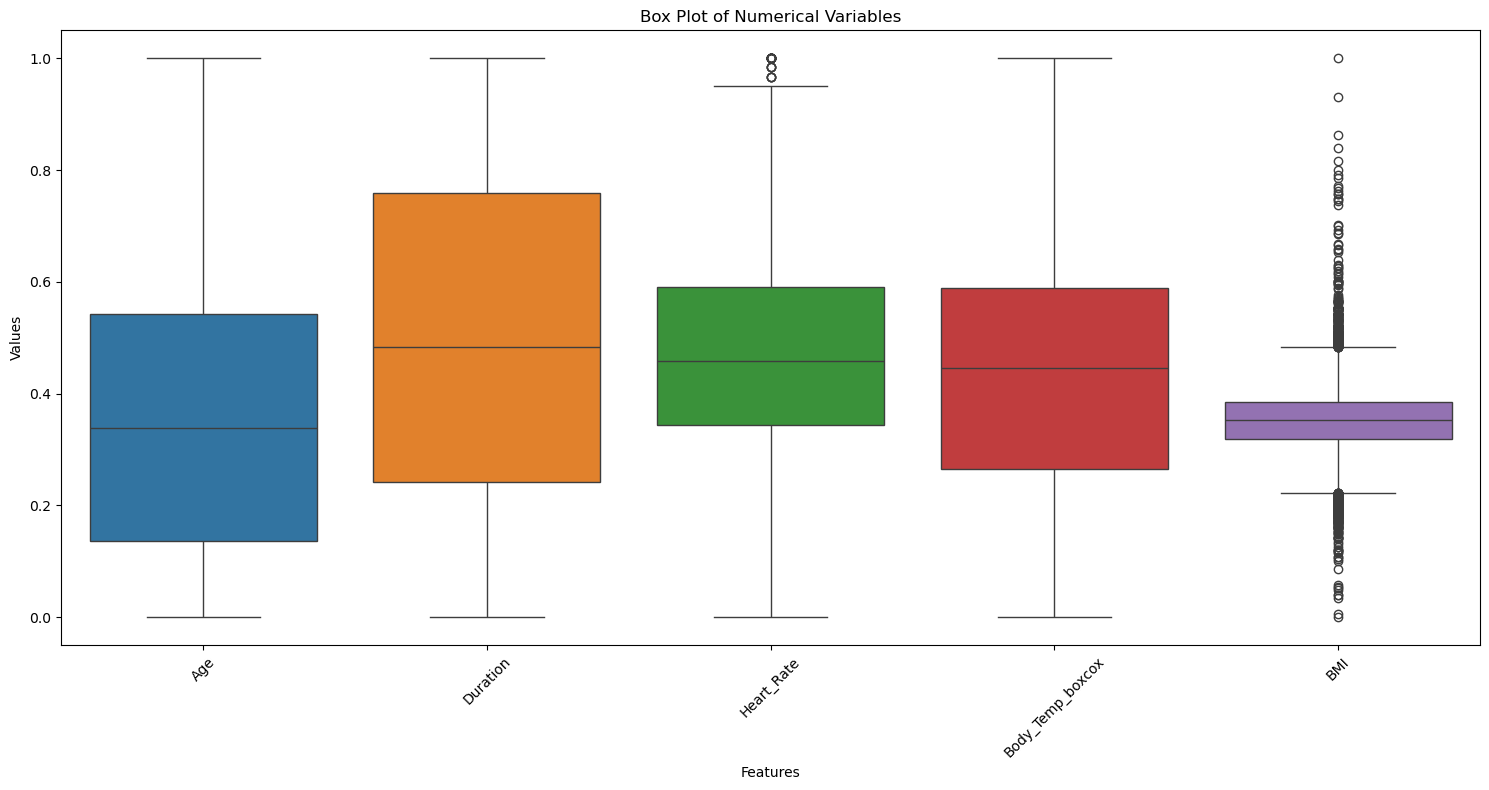

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_train_c[x_numerical_cols])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

## Correlationn Matrix

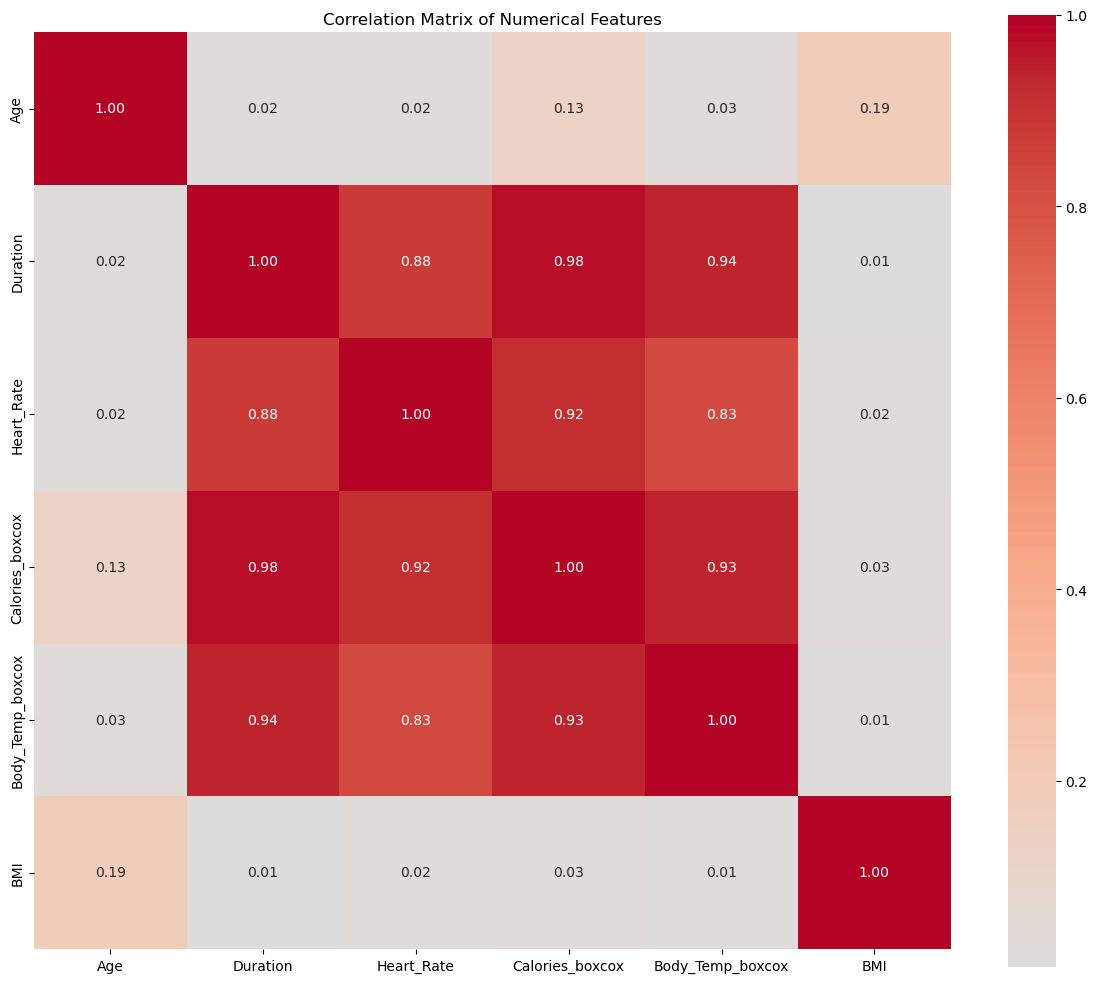

In [21]:
# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_train_c[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Encoding

In [22]:
# Convert Sex column to numerical (0 for male, 1 for female)
df_train_c['Sex'] = df_train_c['Sex'].map({'male': 0, 'female': 1})

print("Values in Sex column after encoding:")
print(df_train_c['Sex'].value_counts())

Values in Sex column after encoding:
Sex
1    374290
0    372869
Name: count, dtype: int64


In [23]:
df_train_c.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'Calories_boxcox', 'Body_Temp_boxcox', 'BMI'],
      dtype='object')

In [24]:
df_train_c.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Calories_boxcox,Body_Temp_boxcox,BMI
0,0,0.271186,189.0,82.0,0.862069,0.557377,41.0,150.0,18.314430,0.721656,0.310547
1,1,0.745763,163.0,60.0,0.241379,0.295082,39.7,34.0,8.446112,0.286709,0.299600
2,1,0.525424,161.0,64.0,0.206897,0.278689,39.8,29.0,7.721979,0.309516,0.361467
3,0,0.000000,192.0,90.0,0.827586,0.622951,40.7,140.0,17.699266,0.589762,0.353355
4,1,0.305085,166.0,61.0,0.827586,0.573770,40.6,146.0,18.071207,0.550726,0.286509


## Define X and Y

In [25]:
X = ['Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp_boxcox', 'BMI'] 
Y= ['Calories_boxcox']


## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_c[X], df_train_c[Y], test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (597727, 6)
X_test shape: (149432, 6)
y_train shape: (597727, 1)
y_test shape: (149432, 1)


## OLS

In [27]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

# Add constant to X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit OLS model
model = sm.OLS(y_train, X_train_sm).fit()

# Make predictions
y_pred_train = model.predict(X_train_sm)
y_pred_test = model.predict(X_test_sm)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print summary and metrics
print(model.summary())
print("\nModel Performance Metrics:")
print(f"Training R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

                            OLS Regression Results                            
Dep. Variable:        Calories_boxcox   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.614e+06
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        15:07:48   Log-Likelihood:            -6.1360e+05
No. Observations:              597727   AIC:                         1.227e+06
Df Residuals:                  597720   BIC:                         1.227e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3724      0.011  

In [28]:
import numpy as np

def rmsle(y_true, y_pred):
    # Since we're working with Box-Cox transformed values, we need to handle them appropriately
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

# Calculate RMSLE for training set
train_rmsle = rmsle(y_train['Calories_boxcox'].values, y_pred_train)

# Calculate RMSLE for test set
test_rmsle = rmsle(y_test['Calories_boxcox'].values, y_pred_test)

print(f"Training RMSLE: {train_rmsle:.4f}")
print(f"Test RMSLE: {test_rmsle:.4f}")

Training RMSLE: 0.6754
Test RMSLE: 0.6746


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    # Ensure non-negative predictions
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [30]:
rmsle_train = rmsle(y_train['Calories_boxcox'].values, y_pred_train)
rmsle_test = rmsle(y_test['Calories_boxcox'].values, y_pred_test)
print(f"Training RMSLE: {rmsle_train:.4f}")
print(f"Test RMSLE: {rmsle_test:.4f}")

Training RMSLE: 0.0988
Test RMSLE: 0.0987


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_train_rmsle = rmsle(y_train['Calories_boxcox'].values, rf_train_pred)
rf_test_rmsle = rmsle(y_test['Calories_boxcox'].values, rf_test_pred)

# Print results
print("Random Forest Model Performance:")
print(f"Training R2: {rf_train_r2:.4f}")
print(f"Test R2: {rf_test_r2:.4f}")
print(f"Training RMSE: {rf_train_rmse:.4f}")
print(f"Test RMSE: {rf_test_rmse:.4f}")
print(f"Training RMSLE: {rf_train_rmsle:.4f}")
print(f"Test RMSLE: {rf_test_rmsle:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Random Forest Model Performance:
Training R2: 0.9994
Test R2: 0.9960
Training RMSE: 0.1334
Test RMSE: 0.3515
Training RMSLE: 0.0170
Test RMSLE: 0.0430

Feature Importance:
            feature  importance
2          Duration    0.951957
3        Heart_Rate    0.027390
1               Age    0.014322
0               Sex    0.003792
5               BMI    0.001782
4  Body_Temp_boxcox    0.000757


In [34]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create XGBoost DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions
xgb_train_pred = xgb_model.predict(dtrain)
xgb_test_pred = xgb_model.predict(dtest)

# Calculate metrics
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_train_rmsle = rmsle(y_train['Calories_boxcox'].values, xgb_train_pred)
xgb_test_rmsle = rmsle(y_test['Calories_boxcox'].values, xgb_test_pred)

# Print results
print("XGBoost Model Performance:")
print(f"Training R2: {xgb_train_r2:.4f}")
print(f"Test R2: {xgb_test_r2:.4f}")
print(f"Training RMSE: {xgb_train_rmse:.4f}")
print(f"Test RMSE: {xgb_test_rmse:.4f}")
print(f"Training RMSLE: {xgb_train_rmsle:.4f}")
print(f"Test RMSLE: {xgb_test_rmsle:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X,
    'importance': xgb_model.get_score(importance_type='weight').values()
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Performance:
Training R2: 0.9964
Test R2: 0.9962
Training RMSE: 0.3322
Test RMSE: 0.3413
Training RMSLE: 0.0419
Test RMSLE: 0.0424

Feature Importance:
            feature  importance
3        Heart_Rate      1348.0
1               Age      1198.0
2          Duration      1106.0
4  Body_Temp_boxcox      1105.0
5               BMI       915.0
0               Sex       475.0


In [33]:
pip install lightgbm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train, y_train['Calories_boxcox'])
lgb_test = lgb.Dataset(X_test, y_test['Calories_boxcox'], reference=lgb_train)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'max_depth': 6,
    'random_state': 42
}

# Train the model
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Make predictions
lgb_train_pred = lgb_model.predict(X_train)
lgb_test_pred = lgb_model.predict(X_test)

# Calculate metrics
lgb_train_r2 = r2_score(y_train, lgb_train_pred)
lgb_test_r2 = r2_score(y_test, lgb_test_pred)
lgb_train_rmse = np.sqrt(mean_squared_error(y_train, lgb_train_pred))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))
lgb_train_rmsle = rmsle(y_train['Calories_boxcox'].values, lgb_train_pred)
lgb_test_rmsle = rmsle(y_test['Calories_boxcox'].values, lgb_test_pred)

# Print results
print("LightGBM Model Performance:")
print(f"Training R2: {lgb_train_r2:.4f}")
print(f"Test R2: {lgb_test_r2:.4f}")
print(f"Training RMSE: {lgb_train_rmse:.4f}")
print(f"Test RMSE: {lgb_test_rmse:.4f}")
print(f"Training RMSLE: {lgb_train_rmsle:.4f}")
print(f"Test RMSLE: {lgb_test_rmsle:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X,
    'importance': lgb_model.feature_importance()
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 597727, number of used features: 6
[LightGBM] [Info] Start training from score 12.821090
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 0.335276	valid_1's rmse: 0.339713
LightGBM Model Performance:
Training R2: 0.9963
Test R2: 0.9962
Training RMSE: 0.3353
Test RMSE: 0.3397
Training RMSLE: 0.0414
Test RMSLE: 0.0416

Feature Importance:
            feature  importance
3        Heart_Rate         816
2          Duration         670
1               Age         627
5               BMI         414
0               Sex         319
4  Body_Temp_boxcox         154


In [ ]:
print(df_test)

            id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       750000    male   45   177.0    81.0       7.0        87.0       39.8
1       750001    male   26   200.0    97.0      20.0       101.0       40.5
2       750002  female   29   188.0    85.0      16.0       102.0       40.4
3       750003  female   39   172.0    73.0      20.0       107.0       40.6
4       750004  female   30   173.0    67.0      16.0        94.0       40.5
...        ...     ...  ...     ...     ...       ...         ...        ...
249995  999995  female   56   159.0    62.0       6.0        85.0       39.4
249996  999996    male   32   202.0   101.0       3.0        84.0       38.4
249997  999997  female   31   164.0    64.0      14.0        98.0       40.1
249998  999998  female   62   158.0    61.0      25.0       106.0       40.7
249999  999999    male   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 8 columns]


In [36]:
# Perform Box-Cox transformation on Body_Temp
body_temp_boxcox, lambda_body_temp = stats.boxcox(df_test['Body_Temp'])
df_test['Body_Temp_boxcox'] = body_temp_boxcox
# Calculate BMI using the formula: weight (kg) / (height (m))^2
# Height is in cm, so we need to convert it to meters by dividing by 100
df_test['BMI'] = df_test['Weight'] / ((df_test['Height']/100) ** 2)

# Display the first few rows to verify the BMI calculation
df_test[['Height', 'Weight', 'BMI']].head()

# Convert Sex column to numerical (0 for male, 1 for female)
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})


In [37]:
df_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Body_Temp_boxcox,BMI
0,750000,0,45,177.0,81.0,7.0,87.0,39.8,3.401303e+38,25.854639
1,750001,0,26,200.0,97.0,20.0,101.0,40.5,5.255586e+38,24.250000
2,750002,1,29,188.0,85.0,16.0,102.0,40.4,4.941121e+38,24.049344
3,750003,1,39,172.0,73.0,20.0,107.0,40.6,5.589214e+38,24.675500
4,750004,1,30,173.0,67.0,16.0,94.0,40.5,5.255586e+38,22.386314


In [38]:
df_test[numerical_cols_to_scale] = scaler.transform(df_test[numerical_cols_to_scale])

In [39]:
df_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Body_Temp_boxcox,BMI
0,750000,0,0.423729,177.0,81.0,0.206897,0.327869,39.8,0.251665,0.395641
1,750001,0,0.101695,200.0,97.0,0.655172,0.557377,40.5,0.424078,0.348540
2,750002,1,0.152542,188.0,85.0,0.517241,0.573770,40.4,0.394838,0.342650
3,750003,1,0.322034,172.0,73.0,0.655172,0.655738,40.6,0.455098,0.361029
4,750004,1,0.169492,173.0,67.0,0.517241,0.442623,40.5,0.424078,0.293835


In [40]:
from scipy import special

def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lambda_ * y + 1) / lambda_)

# Make predictions using the LightGBM model
y_pred_final = lgb_model.predict(df_test[X])
df_test['Calories_boxcox'] = y_pred_final

# Apply inverse Box-Cox transformation
df_test['Calories'] = inverse_boxcox(df_test['Calories_boxcox'], lambda_calories)

# Ensure non-negative values and round to 2 decimal places
df_test['Calories'] = np.maximum(0, df_test['Calories'])
df_test['Calories'] = np.round(df_test['Calories'], 2)

In [41]:
print(y_pred_final)

[ 7.42823821 15.14318931 14.14551879 ... 12.62968597 19.29995628
 12.59539775]


In [42]:
df_test

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Body_Temp_boxcox,BMI,Calories_boxcox,Calories
0,750000,0,0.423729,177.0,81.0,0.206897,0.327869,39.8,0.251665,0.395641,7.428238,27.10
1,750001,0,0.101695,200.0,97.0,0.655172,0.557377,40.5,0.424078,0.348540,15.143189,102.53
2,750002,1,0.152542,188.0,85.0,0.517241,0.573770,40.4,0.394838,0.342650,14.145519,89.66
3,750003,1,0.322034,172.0,73.0,0.655172,0.655738,40.6,0.455098,0.361029,16.870797,127.14
4,750004,1,0.169492,173.0,67.0,0.517241,0.442623,40.5,0.424078,0.293835,12.996835,76.03
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,1,0.610169,159.0,62.0,0.172414,0.295082,39.4,0.181194,0.356592,7.319259,26.41
249996,999996,0,0.203390,202.0,101.0,0.068966,0.278689,38.4,0.064802,0.363289,3.535878,8.44
249997,999997,1,0.186441,164.0,64.0,0.448276,0.508197,40.1,0.316854,0.335195,12.629686,71.93
249998,999998,1,0.711864,158.0,61.0,0.827586,0.639344,40.7,0.488005,0.353975,19.299956,166.83


In [43]:
final_df = df_test[['id', 'Calories']]
final_df.to_csv('v1_submission.csv', index=False)

## XGBoost with Log and log inverse

Here's why RMSLE and the log1p transformation go hand-in-hand:

Penalizing Relative Errors: RMSLE penalizes relative errors more heavily than absolute errors. This is because it calculates the difference between the logarithms of the predicted and actual values. A large absolute error on a small target value will result in a larger relative error (and thus a higher penalty in RMSLE) than the same absolute error on a large target value. For example:

Error of 10 on a target of 10: log(1+20)−log(1+10)≈3.04−2.39=0.65
Error of 10 on a target of 100: log(1+110)−log(1+100)≈4.71−4.61=0.10 This makes RMSLE suitable for targets that span several orders of magnitude or where predicting smaller values accurately is as important as predicting larger values. Calorie expenditure, while not spanning extreme orders of magnitude, is always non-negative, and relative accuracy is often desired.
Handling Skewed Data: Target variables in regression, especially physical quantities like calories burned, are often skewed. They typically have a lower bound of zero and might have a long tail towards higher values. Taking the logarithm of such a variable often makes its distribution more symmetrical and closer to a normal distribution, which can help many regression models (especially linear models or those sensitive to Gaussian noise assumptions).

$ \text{RMSE}(\log(1+y), \log(1+\hat{y})) = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(1 + \hat{y}_i) - \log(1 + y_i))^2} $

This is exactly the RMSLE formula for the original target! Therefore, training a model to minimize the RMSE on the log1p transformed target is equivalent to training a model to minimize the RMSLE on the original target.

In [45]:
# converting to np.log1p before training
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)


In [46]:


dtrain = xgb.DMatrix(X_train, label=y_train_transformed)
dtest = xgb.DMatrix(X_test, label=y_test_transformed)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions
xgb_train_pred = xgb_model.predict(dtrain)
xgb_test_pred = xgb_model.predict(dtest)

xgb_train_pred_orig = np.expm1(xgb_train_pred)
xgb_test_pred_orig = np.expm1(xgb_test_pred)
# Calculate metrics
xgb_train_r2 = r2_score(y_train, xgb_train_pred_orig)
xgb_test_r2 = r2_score(y_test, xgb_test_pred_orig)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred_orig))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred_orig))
xgb_train_rmsle = rmsle(y_train['Calories_boxcox'].values, xgb_train_pred_orig)
xgb_test_rmsle = rmsle(y_test['Calories_boxcox'].values, xgb_test_pred_orig)

# Print results
print("XGBoost Model Performance:")
print(f"Training R2: {xgb_train_r2:.4f}")
print(f"Test R2: {xgb_test_r2:.4f}")
print(f"Training RMSE: {xgb_train_rmse:.4f}")
print(f"Test RMSE: {xgb_test_rmse:.4f}")
print(f"Training RMSLE: {xgb_train_rmsle:.4f}")
print(f"Test RMSLE: {xgb_test_rmsle:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X,
    'importance': xgb_model.get_score(importance_type='weight').values()
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:21:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Performance:
Training R2: 0.9963
Test R2: 0.9961
Training RMSE: 0.3357
Test RMSE: 0.3462
Training RMSLE: 0.0404
Test RMSLE: 0.0415

Feature Importance:
            feature  importance
3        Heart_Rate      1300.0
1               Age      1253.0
4  Body_Temp_boxcox      1180.0
2          Duration       966.0
5               BMI       892.0
0               Sex       502.0


In [48]:
d_x_test = xgb.DMatrix(df_test[X])
y_pred_final = xgb_model.predict(d_x_test)
df_test['Calories_boxcox'] = np.expm1(y_pred_final)

# Apply inverse Box-Cox transformation
df_test['Calories'] = inverse_boxcox(df_test['Calories_boxcox'], lambda_calories)

# Ensure non-negative values and round to 2 decimal places
df_test['Calories'] = np.maximum(0, df_test['Calories'])
df_test['Calories'] = np.round(df_test['Calories'], 2)

In [49]:
df_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Body_Temp_boxcox,BMI,Calories_boxcox,Calories
0,750000,0,0.423729,177.0,81.0,0.206897,0.327869,39.8,0.251665,0.395641,7.521622,27.690001
1,750001,0,0.101695,200.0,97.0,0.655172,0.557377,40.5,0.424078,0.348540,15.192776,103.199997
2,750002,1,0.152542,188.0,85.0,0.517241,0.573770,40.4,0.394838,0.342650,14.156765,89.800003
3,750003,1,0.322034,172.0,73.0,0.655172,0.655738,40.6,0.455098,0.361029,16.866222,127.070000
4,750004,1,0.169492,173.0,67.0,0.517241,0.442623,40.5,0.424078,0.293835,13.068313,76.839996


In [50]:
final_df_xgb = df_test[['id', 'Calories']]
final_df_xgb.to_csv('v2_submission.csv', index=False)

## LightGBM with imp features


In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV



# Define the important features based on previous analysis
imp_features = ['Heart_Rate', 'Duration', 'Age']

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100],
    'max_depth': [3, 5],
    'num_leaves': [31, 50]
}

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    boosting_type='gbdt',
    random_state=42
)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=8,  # Try all 8 combinations (since grid is small), or reduce if desired
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the search on training data
random_search.fit(X_train[imp_features], y_train['Calories_boxcox'])

# Best parameters
print("Best parameters found:")
print(random_search.best_params_)
print(f"Best RMSE (CV): {-random_search.best_score_:.4f}")

# Train model with best parameters
best_params = random_search.best_params_
best_model_lgb = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    boosting_type='gbdt',
    random_state=42,
    **best_params
)
best_model_lgb.fit(X_train[imp_features], y_train['Calories_boxcox'])

# Predict on train and test
lgb_train_pred = best_model_lgb.predict(X_train[imp_features])
lgb_test_pred = best_model_lgb.predict(X_test[imp_features])

# Evaluate model
lgb_train_r2 = r2_score(y_train, lgb_train_pred)
lgb_test_r2 = r2_score(y_test, lgb_test_pred)
lgb_train_rmse = np.sqrt(mean_squared_error(y_train, lgb_train_pred))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))
lgb_train_rmsle = rmsle(y_train['Calories_boxcox'].values, lgb_train_pred)
lgb_test_rmsle = rmsle(y_test['Calories_boxcox'].values, lgb_test_pred)

# Print performance
print("\nLightGBM Model Performance with Best Parameters:")
print(f"Training R2: {lgb_train_r2:.4f}")
print(f"Test R2: {lgb_test_r2:.4f}")
print(f"Training RMSE: {lgb_train_rmse:.4f}")
print(f"Test RMSE: {lgb_test_rmse:.4f}")
print(f"Training RMSLE: {lgb_train_rmsle:.4f}")
print(f"Test RMSLE: {lgb_test_rmsle:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': imp_features,
    'importance': best_model_lgb.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data

In [57]:
df_test[imp_features]

,Heart_Rate,Duration,Age
0,0.327869,0.206897,0.423729
1,0.557377,0.655172,0.101695
2,0.573770,0.517241,0.152542
3,0.655738,0.655172,0.322034
4,0.442623,0.517241,0.169492
...,...,...,...
249995,0.295082,0.172414,0.610169
249996,0.278689,0.068966,0.203390
249997,0.508197,0.448276,0.186441
249998,0.639344,0.827586,0.711864


In [58]:
# d_x_test = xgb.DMatrix(df_test[imp_features])
y_pred_final = best_model_lgb.predict(df_test[imp_features])
df_test['Calories_boxcox'] = np.expm1(y_pred_final)

# Apply inverse Box-Cox transformation
df_test['Calories'] = inverse_boxcox(df_test['Calories_boxcox'], lambda_calories)

# Ensure non-negative values and round to 2 decimal places
df_test['Calories'] = np.maximum(0, df_test['Calories'])
df_test['Calories'] = np.round(df_test['Calories'], 2)

In [60]:
final_df_xgb_imp = df_test[['id', 'Calories']]
final_df_xgb_imp.to_csv('v3_submission.csv', index=False)

In [61]:
final_df_xgb_imp

,id,Calories
0,750000,6.755865e+06
1,750001,3.819294e+14
2,750002,1.229049e+13
3,750003,9.079419e+15
4,750004,5.602257e+11
...,...,...
249995,999995,1.936894e+06
249996,999996,1.188920e+03
249997,999997,3.957058e+11
249998,999998,1.226943e+19


In [74]:
from sklearn.model_selection import train_test_split
X = ['Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp_boxcox', 'BMI'] 
Y= ['Calories']
X_train, X_test, y_train, y_test = train_test_split(df_train_c[X], df_train_c[Y], test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (597727, 6)
X_test shape: (149432, 6)
y_train shape: (597727, 1)
y_test shape: (149432, 1)


In [77]:
y_train.head()

,Calories
258396,36.0
506059,160.0
58057,32.0
536977,30.0
274876,197.0


In [96]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
imp_features =  X #['Heart_Rate', 'Duration', 'Age']

def rmsle(y_true, y_pred):
    # Since we're working with Box-Cox transformed values, we need to handle them appropriately
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train[imp_features], y_train['Calories'])
lgb_test = lgb.Dataset(X_test[imp_features], y_test['Calories'], reference=lgb_train)
# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves':  50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'max_depth': 5,
    'random_state': 42,
    'n_estimators': 100,
}



# Train the model
# lgb_model_best_params = lgb.train(
#     params,
#     lgb_train,
#     num_boost_round=100,
#     valid_sets=[lgb_train, lgb_test],
#     callbacks=[lgb.early_stopping(stopping_rounds=20)],

# )
lgb_model_best_params = lgb.LGBMRegressor(
 objective='regression_l1', # Objective for regression. 'regression' (L2) or 'regression_l1' (L1) are common. RMSLE objective exists but training on log1p with L2/RMSE is standard.
    n_estimators=1000,         # Number of boosting rounds
    learning_rate=0.05,        # Step size shrinkage
    num_leaves=50,             # Maximum tree leaves for leaf-wise algorithm
    max_depth=-1,              # No limit on tree depth
    subsample=0.8,             # Fraction of samples used per boosting round
    colsample_bytree=0.9,      # Fraction of features used per boosting round
    random_state=42,
    n_jobs=-1,      
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    metric='rmse',
    # callbacks=[lgb.early_stopping(stopping_rounds=20)],
    verbose=-1
)

lgb_model_best_params.fit(X_train[imp_features], y_train['Calories'])
# Make predictions

lgb_test_pred = lgb_model_best_params.predict(X_test[imp_features])

# Calculate metrics

lgb_test_r2 = r2_score(y_test, lgb_test_pred)

lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))

lgb_test_rmsle = rmsle(y_test['Calories'].values, lgb_test_pred)

# Print results
print("LightGBM Model Performance:")

print(f"Test R2: {lgb_test_r2:.4f}")

print(f"Test RMSE: {lgb_test_rmse:.4f}")

print(f"Test RMSLE: {lgb_test_rmsle:.4f}")


LightGBM Model Performance:
Test R2: 0.9932
Test RMSE: 5.1275
Test RMSLE: 5.1275


In [97]:
df_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Body_Temp_boxcox,BMI,Calories_boxcox,Calories
0,750000,0,0.423729,177.0,81.0,0.206897,0.327869,39.8,0.251665,0.395641,2.286833e+03,29.21
1,750001,0,0.101695,200.0,97.0,0.655172,0.557377,40.5,0.424078,0.348540,5.862781e+06,107.11
2,750002,1,0.152542,188.0,85.0,0.517241,0.573770,40.4,0.394838,0.342650,1.294007e+06,89.44
3,750003,1,0.322034,172.0,73.0,0.655172,0.655738,40.6,0.455098,0.361029,2.361129e+07,129.71
4,750004,1,0.169492,173.0,67.0,0.517241,0.442623,40.5,0.424078,0.293835,3.328506e+05,73.13


In [98]:
# d_x_test = xgb.DMatrix(df_test[imp_features])
y_pred_final = lgb_model_best_params.predict(df_test[imp_features])

# Apply inverse Box-Cox transformation
# df_test['Calories'] = inverse_boxcox(df_test['Calories_boxcox'], lambda_calories)

# Ensure non-negative values and round to 2 decimal places
df_test['Calories'] = np.maximum(0, y_pred_final)
df_test['Calories'] = np.round(df_test['Calories'], 2)

In [99]:
df_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Body_Temp_boxcox,BMI,Calories_boxcox,Calories
0,750000,0,0.423729,177.0,81.0,0.206897,0.327869,39.8,0.251665,0.395641,2.286833e+03,27.60
1,750001,0,0.101695,200.0,97.0,0.655172,0.557377,40.5,0.424078,0.348540,5.862781e+06,102.71
2,750002,1,0.152542,188.0,85.0,0.517241,0.573770,40.4,0.394838,0.342650,1.294007e+06,90.56
3,750003,1,0.322034,172.0,73.0,0.655172,0.655738,40.6,0.455098,0.361029,2.361129e+07,127.60
4,750004,1,0.169492,173.0,67.0,0.517241,0.442623,40.5,0.424078,0.293835,3.328506e+05,76.72


In [100]:
final_df_xgb_imp = df_test[['id', 'Calories']]
final_df_xgb_imp.to_csv('v4_submission.csv', index=False)

## Training on original + train from comp...

In [102]:
df_train = pd.read_csv("datasets/competition/train.csv")
df_original = pd.read_csv("datasets/original/calories.csv")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [105]:
df_original.columns = df_train.columns
df_original.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [106]:
df_combined = pd.concat([df_train, df_original], ignore_index=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765000 entries, 0 to 764999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          765000 non-null  int64  
 1   Sex         765000 non-null  object 
 2   Age         765000 non-null  int64  
 3   Height      765000 non-null  float64
 4   Weight      765000 non-null  float64
 5   Duration    765000 non-null  float64
 6   Heart_Rate  765000 non-null  float64
 7   Body_Temp   765000 non-null  float64
 8   Calories    765000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 52.5+ MB


In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_combined_no_dup = df_combined.drop_duplicates(subset=df_combined.columns.difference(['id']), keep='first')
df_combined_clean = df_combined_no_dup.drop(columns=["id"], axis=1)
df_combined_clean['BMI'] = df_combined_clean['Weight'] / ((df_combined_clean['Height']/100) ** 2)
scaler = MinMaxScaler()
numerical_cols = ['Age', 'Duration', 'Heart_Rate', 'Calories', 'Body_Temp', 'BMI']
x_numerical_cols = ['Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']

numerical_cols_to_scale = [col for col in numerical_cols if col not in ["Calories"]]  # excluding target variable

# Fit and transform the numerical columns
df_combined_clean[numerical_cols_to_scale] = scaler.fit_transform(df_combined_clean[numerical_cols_to_scale])
df_combined_clean['Sex'] = df_combined_clean['Sex'].map({'male': 0, 'female': 1})
X = ['Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI'] 
Y= ['Calories']
X_train, X_test, y_train, y_test = train_test_split(df_combined_clean[X], df_combined_clean[Y], test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (609685, 6)
X_test shape: (152422, 6)
y_train shape: (609685, 1)
y_test shape: (152422, 1)


In [133]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
imp_features =  X #['Heart_Rate', 'Duration', 'Age']

def rmsle(y_true, y_pred):
    # Since we're working with Box-Cox transformed values, we need to handle them appropriately
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train[imp_features], np.log1p(y_train['Calories']))
lgb_test = lgb.Dataset(X_test[imp_features], np.log1p(y_test['Calories']), reference=lgb_train)
# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves':  50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'max_depth': 5,
    'random_state': 42,
    'n_estimators': 100,
}



# Train the model
# lgb_model_best_params = lgb.train(
#     params,
#     lgb_train,
#     num_boost_round=100,
#     valid_sets=[lgb_train, lgb_test],
#     callbacks=[lgb.early_stopping(stopping_rounds=20)],

# )
lgb_model_best_params = lgb.LGBMRegressor(
 objective='regression', # Objective for regression. 'regression' (L2) or 'regression_l1' (L1) are common. RMSLE objective exists but training on log1p with L2/RMSE is standard.
    n_estimators=1000,         # Number of boosting rounds
    learning_rate=0.05,        # Step size shrinkage
    num_leaves=50,             # Maximum tree leaves for leaf-wise algorithm
    max_depth=-1,              # No limit on tree depth
    subsample=0.8,             # Fraction of samples used per boosting round
    colsample_bytree=0.9,      # Fraction of features used per boosting round
    random_state=42,
    n_jobs=-1,      
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    metric='rmse',
    # callbacks=[lgb.early_stopping(stopping_rounds=20)],
    verbose=-1
)

lgb_model_best_params.fit(X_train[imp_features], np.log1p(y_train['Calories']))
# Make predictions

lgb_test_pred = np.expm1(lgb_model_best_params.predict(X_test[imp_features]))

print(y_test)
# Calculate metrics

lgb_test_r2 = r2_score(y_test, lgb_test_pred)

lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))

lgb_test_rmsle = rmsle(y_test['Calories'].values, lgb_test_pred)

# Print results
print("LightGBM Model Performance:")

print(f"Test R2: {lgb_test_r2:.4f}")

print(f"Test RMSE: {lgb_test_rmse:.4f}")

print(f"Test RMSLE: {lgb_test_rmsle:.4f}")


        Calories
235707      37.0
93434       15.0
532896      87.0
556199      30.0
685794      50.0
...          ...
631009     185.0
299491      81.0
61801       38.0
453184     151.0
227162      29.0

[152422 rows x 1 columns]
LightGBM Model Performance:
Test R2: 0.9946
Test RMSE: 4.6039
Test RMSLE: 4.6039


In [118]:
# d_x_test = xgb.DMatrix(df_test[imp_features])
y_pred_final = lgb_model_best_params.predict(df_test[imp_features])

# Apply inverse Box-Cox transformation
# df_test['Calories'] = inverse_boxcox(df_test['Calories_boxcox'], lambda_calories)

# Ensure non-negative values and round to 2 decimal places
df_test['Calories'] = np.maximum(0, y_pred_final)
df_test['Calories'] = np.round(df_test['Calories'], 2)

In [119]:
df_test.head()


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Body_Temp_boxcox,BMI,Calories_boxcox,Calories
0,750000,0,0.423729,177.0,81.0,0.206897,0.327869,39.8,0.251665,0.395641,2.286833e+03,29.58
1,750001,0,0.101695,200.0,97.0,0.655172,0.557377,40.5,0.424078,0.348540,5.862781e+06,104.59
2,750002,1,0.152542,188.0,85.0,0.517241,0.573770,40.4,0.394838,0.342650,1.294007e+06,90.74
3,750003,1,0.322034,172.0,73.0,0.655172,0.655738,40.6,0.455098,0.361029,2.361129e+07,127.75
4,750004,1,0.169492,173.0,67.0,0.517241,0.442623,40.5,0.424078,0.293835,3.328506e+05,77.98


In [120]:
final_df_xgb_imp = df_test[['id', 'Calories']]
final_df_xgb_imp.to_csv('v5_submission.csv', index=False)

In [134]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets for early stopping
X_train_es, X_val, y_train_es, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create XGBoost DMatrix for training, validation and testing data
dtrain = xgb.DMatrix(X_train_es, label=np.log1p(y_train_es))
dval = xgb.DMatrix(X_val, label=np.log1p(y_val))
dtest = xgb.DMatrix(X_test, label=np.log1p(y_test))

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 10,  # Reduced from 20 to prevent overfitting
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train XGBoost model with early stopping
num_rounds = 500  # Maximum number of rounds
xgb_model = xgb.train(
    params, 
    dtrain, 
    num_rounds,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=20,  # Stop if no improvement for 20 rounds
    verbose_eval=50  # Print progress every 50 rounds
)

print(f"Best iteration: {xgb_model.best_iteration}")

# Make predictions using best model
xgb_train_pred = np.expm1(xgb_model.predict(xgb.DMatrix(X_train)))
xgb_test_pred = np.expm1(xgb_model.predict(xgb.DMatrix(X_test)))

# Calculate metrics
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_train_rmsle = rmsle(y_train['Calories'].values, xgb_train_pred)
xgb_test_rmsle = rmsle(y_test['Calories'].values, xgb_test_pred)

# Print results
print("XGBoost Model Performance:")
print(f"Training R2: {xgb_train_r2:.4f}")
print(f"Test R2: {xgb_test_r2:.4f}")
print(f"Training RMSE: {xgb_train_rmse:.4f}")
print(f"Test RMSE: {xgb_test_rmse:.4f}")
print(f"Training RMSLE: {xgb_train_rmsle:.4f}")
print(f"Test RMSLE: {xgb_test_rmsle:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X,
    'importance': xgb_model.get_score(importance_type='weight').values()
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

[0]	train-rmse:0.86850	validation-rmse:0.86894


/opt/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [18:59:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[50]	train-rmse:0.06113	validation-rmse:0.06611
[100]	train-rmse:0.05626	validation-rmse:0.06356
[150]	train-rmse:0.05399	validation-rmse:0.06333
[194]	train-rmse:0.05256	validation-rmse:0.06331
Best iteration: 175
XGBoost Model Performance:
Training R2: 0.9965
Test R2: 0.9958
Training RMSE: 3.6807
Test RMSE: 4.0409
Training RMSLE: 3.6807
Test RMSLE: 4.0409

Feature Importance:
      feature  importance
1         Age     32586.0
5         BMI     30330.0
3  Heart_Rate     26529.0
4   Body_Temp     21830.0
2    Duration     14254.0
0         Sex      5588.0


In [137]:
d_x_test = xgb.DMatrix(df_test[X])
y_pred_final = np.expm1(xgb_model.predict(d_x_test))

# Apply inverse Box-Cox transformation
# df_test['Calories'] = inverse_boxcox(df_test['Calories_boxcox'], lambda_calories)

# Ensure non-negative values and round to 2 decimal places
df_test['Calories'] = np.maximum(0, y_pred_final)
df_test['Calories'] = np.round(df_test['Calories'], 2)

In [138]:
df_test[['id', 'Calories']].head()

,id,Calories
0,750000,30.389999
1,750001,102.820000
2,750002,91.440002
3,750003,126.879997
4,750004,77.599998


In [139]:
final_df_xgb_imp = df_test[['id', 'Calories']]
final_df_xgb_imp.to_csv('v6_submission.csv', index=False)